In [1]:
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.offline as py
import plotly_express as px 
py.init_notebook_mode()
import plotly.graph_objs as go

ModuleNotFoundError: No module named 'plotly_express'

In [ ]:
df = pd.read_csv('Skils.csv')

In [ ]:
df.head()

In [ ]:
df.tail()

In [ ]:
lis3=[]
for i in df:
    lis3.append(df[str(i)].nunique())

cardinal=pd.DataFrame(lis3,df.columns).reset_index()
cardinal=cardinal.rename(columns={'index':'Features',0:'cardinality'})

In [ ]:
cardinal

,Features,cardinality
0,Competitor ID,6
1,Vertical Category,5
2,Primary Skill,530
3,Primary Skill Avg. Search Volume (12 mo),311
4,Primary Skill Avg. Search Volume (6 mo),258
5,Primary Skill Avg. Search Volume (3 mo),190
6,Primary Skill CPC/USD,398
7,Primary Skill PPC,75
8,Primary Skill Keyword Difficulty,76
9,Related Skill,1432


In [ ]:
print("Are There still Missing value in data? :",df.isnull().any().any())
print((df.isnull().sum()/df.shape[0])*100)

Are There still Missing value in data? : True
Competitor ID                                 0.000000
Vertical Category                             0.000000
Primary Skill                                 0.000000
 Primary Skill Avg. Search Volume (12 mo)     4.063770
Primary Skill Avg. Search Volume (6 mo)       4.063770
Primary Skill Avg. Search Volume (3 mo)       4.063770
Primary Skill CPC/USD                         9.377931
Primary Skill PPC                             4.407627
Primary Skill Keyword Difficulty             18.912160
Related Skill                                25.101594
Related Skill Avg. Search Volume (12 mo)     35.073460
Primary Skill Avg. Search Volume (6 mo).1    35.073460
Related Skill Avg. Search Volume (3 mo)      35.073460
Related Skill CPC/USD                        42.700844
Related Skill PPC                            35.479837
Related Skill Keyword Difficulty             49.390435
# of Jobs                                     0.000000
dtype: float64


In [ ]:
df.head(2)

,Competitor ID,Vertical Category,Primary Skill,Primary Skill Avg. Search Volume (12 mo),Primary Skill Avg. Search Volume (6 mo),Primary Skill Avg. Search Volume (3 mo),Primary Skill CPC/USD,Primary Skill PPC,Primary Skill Keyword Difficulty,Related Skill,Related Skill Avg. Search Volume (12 mo),Primary Skill Avg. Search Volume (6 mo).1,Related Skill Avg. Search Volume (3 mo),Related Skill CPC/USD,Related Skill PPC,Related Skill Keyword Difficulty,# of Jobs
0,A,Development,WordPress Developers,"4,300","5,400","6,300",46.47,32.0,60.0,Woocommerce Developers,290,300,300,65.48,38.0,38.0,863.0
1,A,Development,WordPress Developers,"4,300","5,400","6,300",46.47,32.0,60.0,GoDaddy Freelancers,10,10,10,NaN,NaN,NaN,1171.0


In [ ]:
df.dtypes

Competitor ID                                 object
Vertical Category                             object
Primary Skill                                 object
 Primary Skill Avg. Search Volume (12 mo)     object
Primary Skill Avg. Search Volume (6 mo)       object
Primary Skill Avg. Search Volume (3 mo)       object
Primary Skill CPC/USD                        float64
Primary Skill PPC                            float64
Primary Skill Keyword Difficulty             float64
Related Skill                                 object
Related Skill Avg. Search Volume (12 mo)      object
Primary Skill Avg. Search Volume (6 mo).1     object
Related Skill Avg. Search Volume (3 mo)       object
Related Skill CPC/USD                        float64
Related Skill PPC                            float64
Related Skill Keyword Difficulty             float64
# of Jobs                                    float64
dtype: object

In [ ]:
max(df['# of Jobs'])

4997.0

In [ ]:
import plotly.io as pio
pio.renderers.default = "colab"

In [96]:

fig = px.bar(df, x='Vertical Category', y= 'Primary Skill CPC/USD', title="Most Lucrative Vertical")
fig.update_traces(marker_line = dict(width=0))
fig.show()

In [ ]:
fig = px.bar(df, x='Vertical Category', y= '# of Jobs')
fig.update_traces(marker_line = dict(width=0))
fig.show()

In [ ]:

df["# of Jobs"] = [float(str(i).replace(",", "")) for i in df["# of Jobs"]]

In [ ]:
'''1. What are the most lucrative verticals?
2. Which primary and secondary skills seem to be the lowest hanging fruit, and
why?
3. What are the most common related skills to primary skills, both by vertical and
overall?
4. How might you go about determining which related skills are strongest to the
primary skills?'''

In [82]:

top_activities = df.groupby(by='Primary Skill')['Primary Skill CPC/USD'].sum().sort_values( ascending =False).head(10).reset_index()

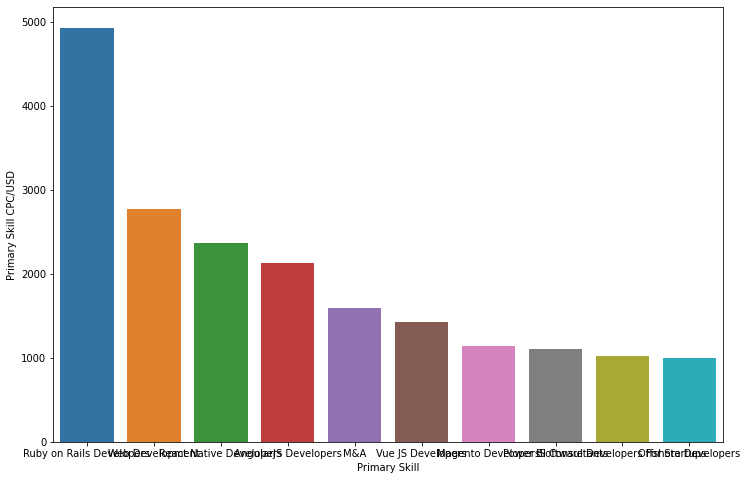

In [83]:
plt.figure(figsize=(12,8))


sns.barplot(x=top_activities['Primary Skill'], y=top_activities['Primary Skill CPC/USD'], data=df)

In [97]:
top_activities = df.groupby(by='Primary Skill')['# of Jobs'].sum().sort_values(ascending =True).head(10).reset_index()

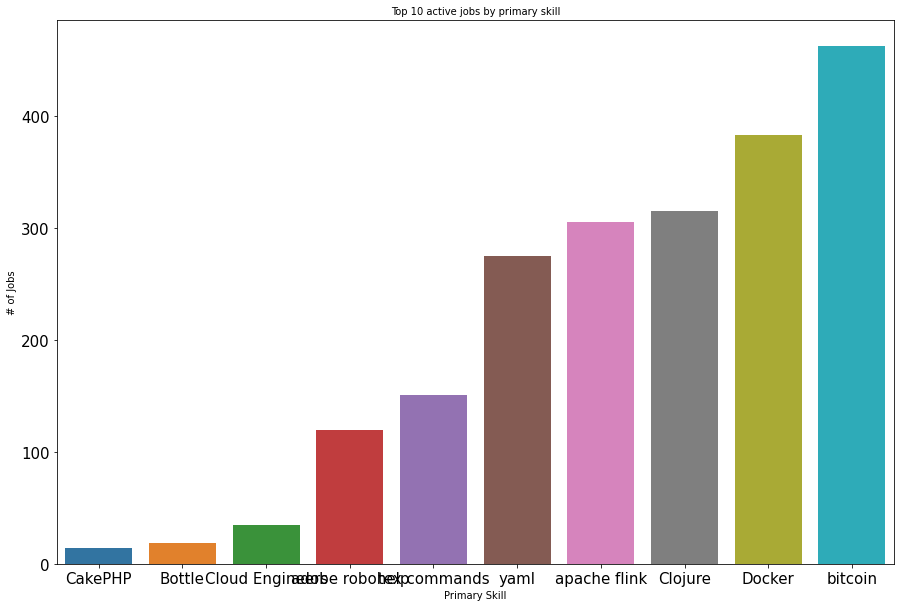

In [98]:
plt.figure(figsize=(15,10))
plt.xticks(fontsize =15)
plt.yticks(fontsize=15)
plt.title('Top 10 active jobs by primary skill' ,fontsize=10)

ax = sns.barplot(x=top_activities['Primary Skill'], y = top_activities['# of Jobs'])


In [100]:
top_activities = df.groupby(by='Primary Skill')['# of Jobs'].sum().sort_values(ascending =False).head(10).reset_index()

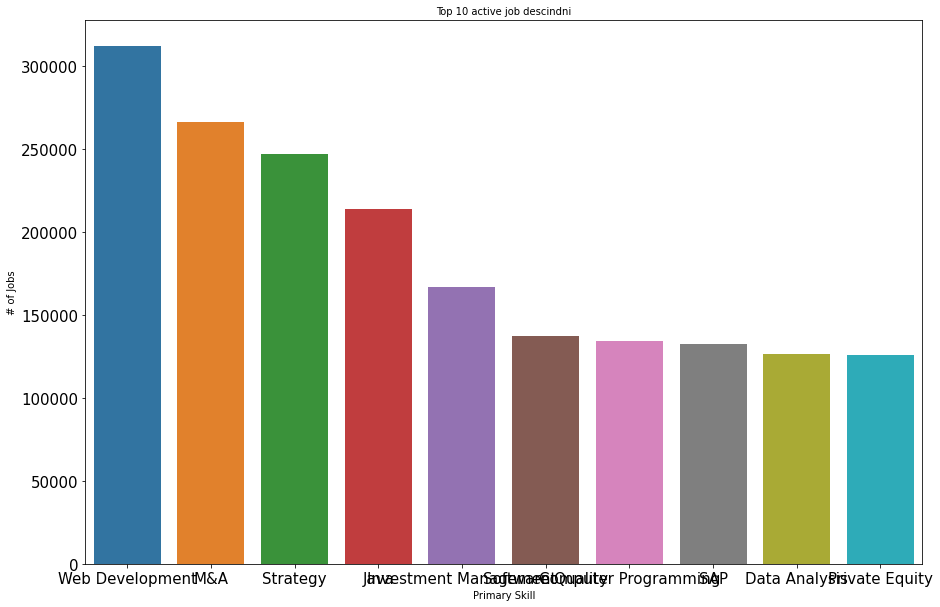

In [101]:
plt.figure(figsize=(15,10))
plt.xticks(fontsize =15)
plt.yticks(fontsize=15)
plt.title('Top 10 active job descindni' ,fontsize=10)

ax = sns.barplot(x=top_activities['Primary Skill'], y = top_activities['# of Jobs'])


In [103]:
top_activities = df.groupby(by='Primary Skill')['Primary Skill CPC/USD'].sum().sort_values(ascending =False).head(10).reset_index()

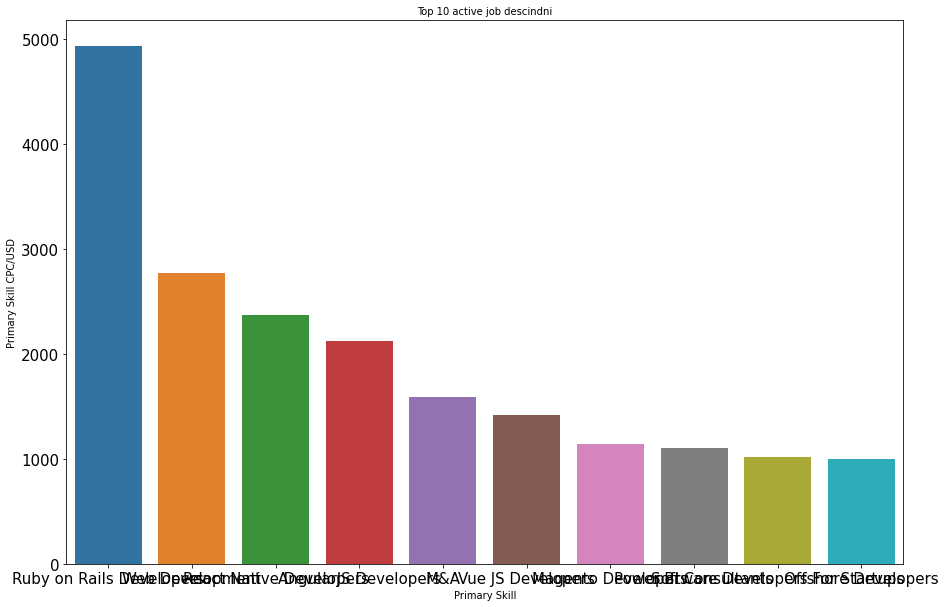

In [104]:
plt.figure(figsize=(15,10))
plt.xticks(fontsize =15)
plt.yticks(fontsize=15)
plt.title('Top 10 active job descindni' ,fontsize=10)

ax = sns.barplot(x=top_activities['Primary Skill'], y = top_activities['Primary Skill CPC/USD'])


In [90]:
top_activities = df.groupby(by=['Primary Skill', 'Related Skill'])['# of Jobs'].sum().sort_values(ascending =True).head(10).reset_index()

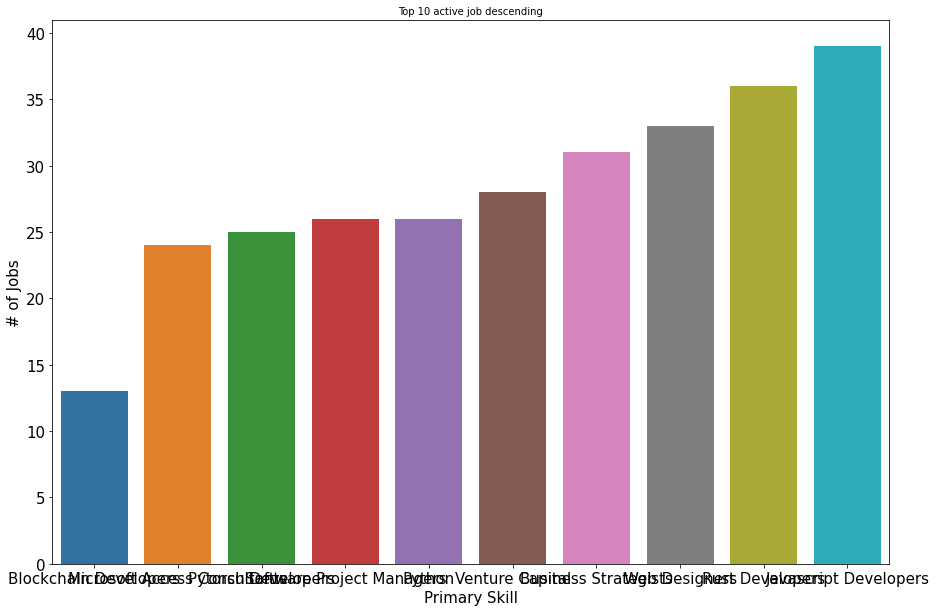

In [91]:
plt.figure(figsize=(15,10))
plt.xticks(fontsize =15)
plt.yticks(fontsize=15)
plt.title('Top 10 active job descending' ,fontsize=10)

ax = sns.barplot(x=top_activities['Primary Skill'], y = top_activities['# of Jobs'])


In [92]:
top_activities = df.groupby(by=['Primary Skill', 'Related Skill'])['# of Jobs'].sum().sort_values(ascending =False).head(10).reset_index()

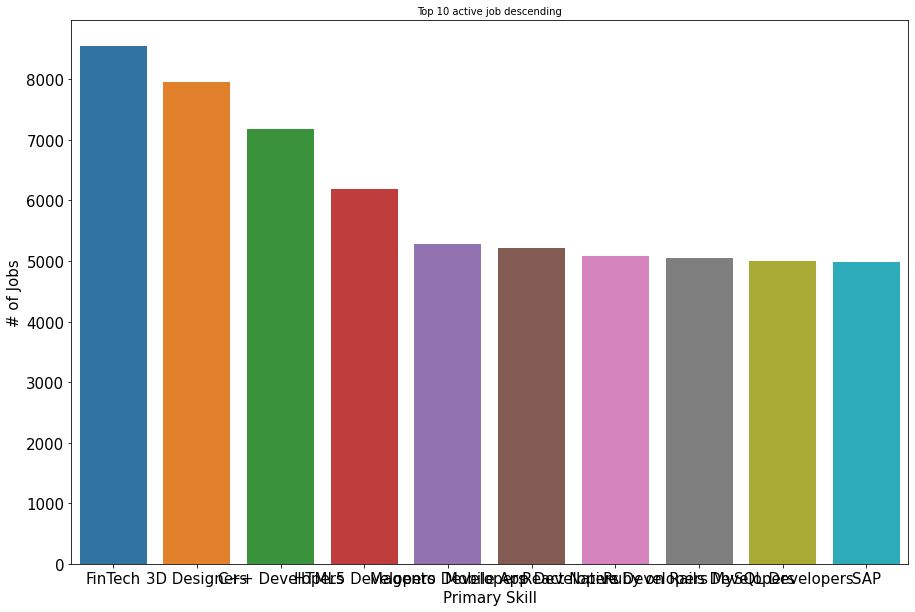

In [93]:
plt.figure(figsize=(15,10))
plt.xticks(fontsize =15)
plt.yticks(fontsize=15)
plt.title('Top 10 active job descending' ,fontsize=10)

ax = sns.barplot(x=top_activities['Primary Skill'], y = top_activities['# of Jobs'])
